# Hands-on 04: Operações importantes com sinais 

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre autocorrelação (seu significado e seu cálculo);
- Fazer uma breve revisão sobre cálculo de potência e energia de um sinal (seu significado e seu cálculo);
- Fazer uma aplicação prática com a autocorrelção (remoção de eco com a autocorrelação).

## Autocorrelação 

A função de autocorrelação ${R}_{xx}$ de um sinal aleatório descreve a dependência geral dos valores das amostras sobre seus valores em outro momento, visando encontrar padrões de repetição em tais sinais (não aleatoriedades) **ou mesmo para identificar a frequência fundamental,implícita pelas suas frequências harmônicas.**

Por se tratar da análise de relação entre um sinal e ele mesmo, podemos ter diversas aplicações em telecom, tais como:

- Detecção de sinais;
- Detecção de atraso em sinais (cancelamento de eco);
- Atraso entre sinais recebidos por sensores em posições diferentes;
- Detecção de padrões de sinalização conhecidos (e.g. detecção de preâmbulo);
- Determinação da frequência e potência de um sinal;
- Predição de séries temporais.

Como a autocorrelação é uma medida estatística não vinculada a uma área de aplicação específica, trabalhos em outras áreas bem diferentes de telecomunicações podem ser achados em grande quantidade, tais como:

- AUTOCORRELAÇÃO ESPACIAL NA ÁREA DE LOJA DE SUPERMERCADOS NOS MUNICÍPIOS PAULISTAS(http://www.scielo.br/pdf/rae/v39n4/v39n4a05)
- MODELAGEM DA AUTOCORRELAÇÃO RESIDUAL PELO MÉTODO DOS MÍNIMOS QUADRADOS GENERALIZADOS COM APLICAÇÃO AO MERCADO DE CARNE DE FRANGO (http://dspace.bc.uepb.edu.br/jspui/bitstream/123456789/7096/1/PDF%20-%20Ianne%20Porfirio%20de%20Queiroz.pdf)


## Cálculo da autocorrelação

Define-se a autocorrelação de um processo aleatório contínuo (e.g. um sinal de voz) como:

$${R}_{xx}(\tau)=\lim_{T\rightarrow \infty} \frac{1}{T}\int_{-T}^{T}x(t) \cdot  x(t+\tau)dt$$


Em que $T$ é o período de observação. $R_{xx}(\tau)$ é uma funçãp par de números reais, cujo o valor máximo está em $\tau=0$. 

Para um sinal amostrado, a estimação da autocorrelação é definida como:
 
- Versão biased (com tendência, com viés): 

$$R_{xx}[m]=\frac{1}{N-|m|}\sum_{n=1}^{N-m+1}x[n] \cdot  x[n+m-1]$$

- Versão unbiased (sem tendência, sem viés): 

$$R_{xx}[m]=\frac{1}{N}\sum_{n=1}^{N-m+1}x[n] \cdot  x[n+m-1]$$

para $m = 1, 2, ..., M+1$, em que M é o número de atrasos usados na estimação. 


## Propriedades da autocorrelação

### Valor máximo

### Periodicidade

### Simetria

### Valor médio quadrático

### Autocorrelação de sinais somados

## Energia e Potência

### Energia e densidade espectral de energia
Para um sinal de tempo contínuo x(t), entende-se como energia $E$ de $x(t)$:

$$E = \int\limits_{-\infty}^{+\infty} \left |x(n)\right |^{2}dn$$ 

sendo $ \phi = \left |x(n)\right |^{2}$ definido como a densidade espectral de energia. Pelo teorema da convolução, podemos relacionar autocorrelação com a densidade espectral de energia através da transformada de Fourrier, de forma que:
$$ \phi = F[{R}_{xx}(\tau)]$$
Como trabalharemos sinais discretos no tempo, faremos:

$$E = T_{s}\sum_{n=0}^{N-1} \left |  x[n]  \right |^{2} $$

Dado que a amostragem começará a partir do tempo $n=0$ e terminará em $n = N-1$.

### Potência e densidade espectral de potência

Sinais periódicos são sinais potência, cuja autocorrelação é dada por:
$${R}_{xx}(\tau)=\lim_{T\rightarrow \infty} \frac{1}{T}\int_{-T/2}^{T/2}x(t) \cdot  x(t+\tau)dt$$
Pelo teorema da convolução, podemos relacionar autocorrelação com a densidade espectral de potência (PSD) através da transformada de Fourrier, de forma que:
 
$$S_{x}(f)=F[{R}_{xx}(\tau)]$$

Também podemos calcular a potência total pelo somatório infinitesimal da densidade de potência:
$$P_{x}=\int_{-\infty}^{\infty}S_{x}(f)df$$

Como trabalharemos sinais discretos no tempo, faremos:

$$P = \frac{1}{N}\sum_{n=0}^{N-1} \left |  x[n]  \right |^{2} $$
Dado que a amostragem começará a partir do tempo $n=0$ e terminará em $n = N-1$.

# Prática 1: Cálculo da autocorrelação

Para calcular a autocorrelação de um sinal amostrado não será necessário integrações, pois no tempo discreto sua formulação depende de um somatório. Portanto usaremos a fórmula de autocorrelação discreta para calcular $R_{xx}(m)$. No script, faça:

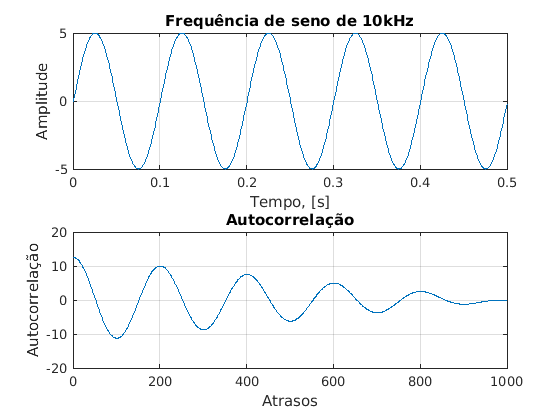

In [56]:
clc; close all;clear all;

%% Parâmetros do sinal 
N=1000;                                 % Número de amostras
f1=10;                                  % Frequência do seno (kHz)
FS=2000;                                % Frequência de amostragem (kHz)
n=0:N-1;                                % Números de índice de amostra
Am=5;                                   % Determina a amplitude
x=Am*sin(2*pi*f1*n/FS);                 % Gera o sinal x(n)
t=[1:N]*(1/FS);                         % Definiçao do eixo do tempo
f=[-0.5*FS:FS/N:0.5*FS-FS/N];           % Eixo da frequência
%% Cálculo da Autocorrelação
Rxx=zeros(1,N);
    for m=1: N
        for n=1: N-m+1
            Rxx(m)=Rxx(m)+x(n)*x(n+m-1);
        end;
    end;
    Rxx=Rxx/N;
%% Plotting
% Plot do sinal
subplot(2,1,1);                         % Coloca o plot em cima
plot(t,x);                              % Plot o sinal x(n)
title('Frequência de seno de 10kHz');
xlabel('Tempo, [s]');
ylabel('Amplitude');
grid;
% Plot da autocorrelação
subplot(2,1,2);                         % Coloca o plot em baixo 
plot(Rxx);                              % Plota a autocorrelação
title('Autocorrelação');
xlabel('Atrasos');
ylabel('Autocorrelação');
grid;

A função obtida acima mostra a autocorrelação do sinal $x(t)$ centrada no zero. 
No Matlab a função autocorrelação chama-se "xcorr()" produzindo uma estimativa da correlação entre duas sequências aleatórias ou a própria autocorrelação. No script abaixo, é feito um exemplo:

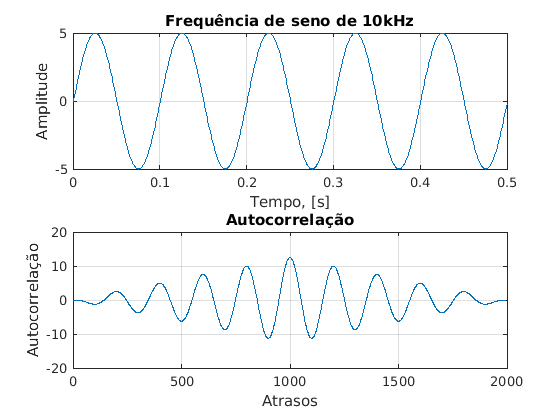

In [2]:
clc; close all;clear all;

%% Parâmetros do sinal 
N=1000;                                 % Número de amostras
f1=10;                                  % Frequência do seno (kHz)
FS=2000;                                % Frequência de amostragem (kHz)
n=0:N-1;                                % Números de índice de amostra
Am=5;                                   % Determina a amplitude
x=Am*sin(2*pi*f1*n/FS);                 % Gera o sinal x(n)
t=[1:N]*(1/FS);                         % Definiçao do eixo do tempo
Rxx=xcorr(x,'biased');                  % Estima / normaliza a autocorrelaçao de x(n)
f=[-0.5*FS:FS/N:0.5*FS-FS/N];           % Eixo da frequência

%% Plotting
% Plota x(n)
subplot(2,1,1);                         % Coloca o plot em cima
plot(t,x);                              % Plot o sinal x(n)
title('Frequência de seno de 10kHz');
xlabel('Tempo, [s]');
ylabel('Amplitude');
grid;
% Plota Autocorrelação
subplot(2,1,2);                         % Coloca o plot em baixo 
plot(Rxx);                              % Plota a autocorrelaçao
title('Autocorrelação');
xlabel('Atrasos');
ylabel('Autocorrelação');
grid;

A função "xcorr" retorna o dobro do número de amostras do sinal $x(n)$. Como esperado, o gráfico acima estima a autocorrelação com $N$=1000 amostras, dessa forma se assemelhando ao gráfico do código feito sem usar a função do Matlab.

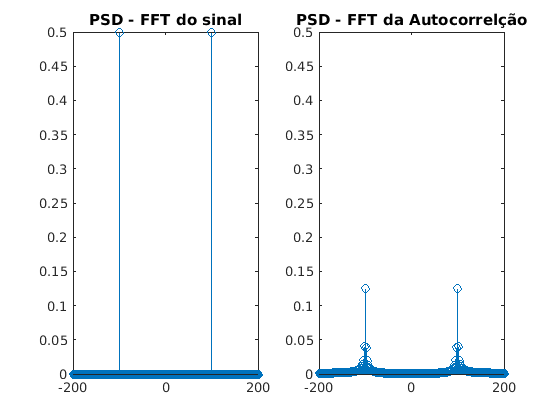

In [5]:
clc; close all;clear all;

%% Parâmetros do sinal 
N=1000;                                 % Número de amostras
f1=100;                                 % Frequência do seno
FS=2000;                                % Frequência de amostragem
n=0:N-1;                                % Números de índice de amostra
x=sin(2*pi*f1*n/FS);                    % Gera o sinal x(n)
t=[1:N]*(1/FS);                         % Definiçao do eixo do tempo
Rxx=xcorr(x);                           % Estima a autocorrelaçao de x(n)
f=[-0.5*FS:FS/N:0.5*FS-FS/N];           % Eixo da frequência

%% FFT do sinal
subplot(1,2,1)                          % Plot superior
Xfft=fft(x,N);                          % Encontra a FFT
Xg=fftshift(Xfft);                      % Coloca o centro do espectro em zero
Sxx=abs(Xg)/N;                          % Encontra o Módulo da PSD
stem (f,Sxx);                           % Plota a PSD
axis([-200 200 0 0.5])
title('PSD - FFT do sinal')
%% FFT da autocorrelação
subplot(1,2,2)                          % Plot Inferior
Sxcor=xcorr(x,'biased');                % Calcula a Autocorrelação
Xfft2=fft(Sxcor,N);                     % Calcula a FFT da autocorrelação
Xshift=fftshift(Xfft2);                 % Coloca o centro do espectro em zero
Sxx2=abs(Xshift)/N;                     % Encontra o Módulo da PSD
stem (f,Sxx2);                          % Plota o gráfico da PSD
axis([-200 200 0 0.5])
title('PSD - FFT da Autocorrelção')

### Potência - Amostras no tempo

No Matlab podemos calcular a potência de um sinal amostrado no tempo de várias formas:

- No tempo:
$$P = \frac{1}{N}\sum_{n=0}^{N-1} \left |  x[n]  \right |^{2} $$

- Na frequência:

$$P = \sum_{n=0}^{N-1} X[k]^{2} $$

- Pela autocorrelação:
$$P = R_{xx}(0)$$

 Em que $R_{xx}(0)$ é a função autocorrelação em seu centro.


- Pela Variancia  $\sigma²(x)$:

$$ P[x²] = \overline{P}[x] + \sigma² $$ 

Como o sinal é senoidal, sua média é sempre zero pois possui picos positivos e negativos simétricos. Conclui-se então que a variância corresponde exatamente à potência do sinal.
- Pela função bandpower:

Retorna a média de potência no sinal de entrada, x.

In [2]:
help bandpower

bandpower - Band power

    This MATLAB function returns the average power in the input signal, x.

    p = bandpower(x)
    p = bandpower(x,fs,freqrange)
    p = bandpower(pxx,f,'psd')
    p = bandpower(pxx,f,freqrange,'psd')

    See also periodogram, sfdr



Deve-se lembrar que os meios de cálculo da potência acima retornam o valor da potência unilateral, bastando multiplicar por 2 para que se tenha a potência bilateral como mostra o script abaixo:

In [1]:
clc; close all;clear all;
%% Parâmetros do sinal 
N=1000;                                   % Número de amostras
f1=10;                                    % Frequência do seno (kHz)
FS=2000;                                  % Frequência de amostragem (kHz)
n=0:N-1;                                  % Números de índice de amostra
Am=5;                                     % Amplitude x(n)
x=Am*sin(2*pi*f1*n/FS);                   % Gera o sinal x(n)
t=[1:N]*(1/FS);                           % Definiçao do eixo do tempo
f=[-0.5*FS:FS/N:0.5*FS-FS/N];             % Eixo da frequência
Rxx=xcorr(x,'biased');                    % Estima / normaliza a autocorrelaçao de x(n)

%% Cálculo da potência no tempo
Px=0;
for n= 1: N
 Px=Px+(abs(x(n)))^2;        
end
Px=(1/N)*Px;

%% Cálculo da potência na frêquencia
X = fft(x)/N;
Pfx=0;
for k= 1: N
 Pfx=Pfx+(X(k).*conj(X(k)));       
end

%% Display

disp(['Potência de duas bandas: '])
                                        % Cálculo da potência de duas bandas
disp(['Parseval tempo      =  ' num2str(Px)]);

                                        % Cálculo da potência de duas bandas
disp(['Parseval Frequencia =  ' num2str(Pfx)]);

PRxx = Rxx(N);                          % Cálculo da potência duas bandas via autocorrelação
disp(['Autocorrelação      =  ' num2str(PRxx)]);

Pxxbp= bandpower(x);                    % Cálculo da potência de duas bandas via bandpower
disp(['Bandpower           =  ' num2str(Pxxbp)])

Pvar = std(x)^2;                        % Cálculo da potência duas bandas via variancia
disp(['Variância           =  ' num2str(Pvar)])

Potência de duas bandas: 
Parseval tempo      =  12.5
Parseval Frequencia =  12.5
Autocorrelação      =  12.5
Bandpower           =  12.5
Variância           =  12.5125


Percebe-se que há um pequeno erro na potência calculada pela variância devido ao número de amostras da senóide. Quanto maior, mais preciso é o cálculo da potência, pois mais próximo de zero será a média $\overline{P}[x] $.

### Removendo eco com a autocorrelação

Como a autocorrelação trata-se de quanto a onda se relaciona com ela mesma, podemos localizar eco no sinal recebido e posteriormente filtra-lo. 

Primeiramente para acrescentar o eco no som, será necessário que aumentemos o comprimento do vetor de dados. Faremos isso para colocar o eco completo no som original. Por exemplo se temos um áudio de 5 segundos e queremos colocar um eco completo de 1 segundo, então nosso áudio final terá comprimento de 6 segundos. No script será feito com um áudio de aproximadamente 2 segundos.
 
Agora teremos que encontrar a região na qual o eco se localiza. Para isso, iremos calcular a auto correlação e ver em qual região há picos usando a função findpeaks() (encontra picos), e então usamos a função filter(). O sinal recebido será idêntico ao sinal original sem eco.

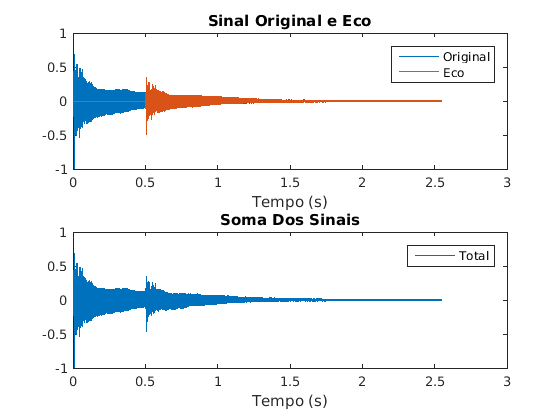

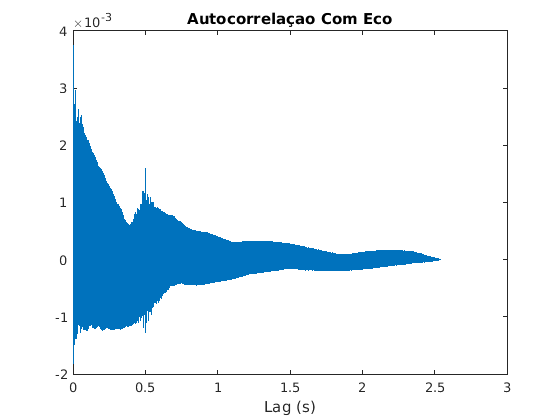

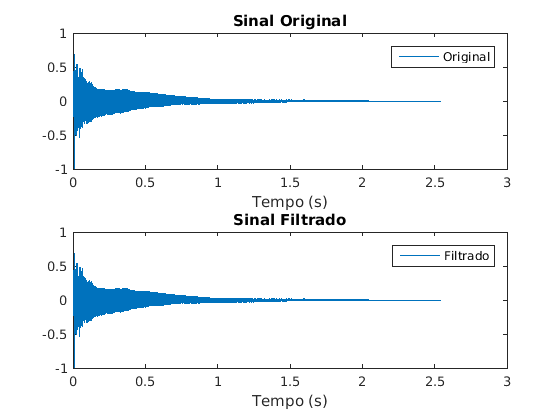

In [2]:
clc;clear all; close all;
%% Abrindo o guitar.wav - Definições de parâmetros 
[y,fs]=  audioread('/home/labsim/python-gppcom/guitar.wav');    % Endereço do nosso sinal
timelag = 0.5;                                                  % Atraso do eco
delta = round(fs*timelag);                                      % Inteiro correspondente a posição do eco
alfa = 0.5;                                                     % Define a amplitude do eco "alfa" 

%% Montagem do eco
orig = [y;zeros(delta,1)];                                      % Completa o final do vetor y com zeros
eco = [zeros(delta,1);y]*alfa;                                  % Completa o início do vetor eco com zeros
Yeco = orig + eco;                                              % Soma som original com o eco
t = (0:length(Yeco)-1)/fs;                                      % Definiçao do eixo do tempo com o comprimento do novo vetor Yeco

%% Cálculo do vetor autocorrelação positivo
[Rxx,lags] = xcorr(Yeco,'unbiased');                            % Calcula a autocorrelação normalizada com o comprimento 
Rxx = Rxx(lags>0);                                              % Pega apenas a parte positiva do vetor Rxx
lags = lags(lags>0);                                            % Pega apenas a parte positiva do vetor lags

%% Encontrando e removendo o eco com filtro            
% Teremos que descobrir onde fica na autocorrelação o local do eco (pico da
% correlação). Usaremos a função findpeaks pra encontrar. Porém por ser um 
% sinal periódico, encontraremos vários picos de correlação. Portanto 
% entende-se como local do eco o pico mais distante e de maior altura. 

[~,dl] = findpeaks(Rxx,lags,'MinPeakHeight',1.5e-3);            % Encontra picos num intervalo minimo entre eles de 2x10-3
newdelta= max(dl)-1;                                            % Novo delta (vetor local de eco)
Ynew = filter(1,[1 zeros(1,newdelta-1) alfa],Yeco);             % Filtra no vetor Yeco a partir da posição newdelta o eco

%% Plotting
% Plotta Sinal Original e Sinal filtrado 
% Plota o sinal original
figure(3)
subplot(2,1,1)
plot(t,orig)
title('Sinal Original')
legend('Original')
xlabel('Tempo (s)')
% Plota o sinal filtrado (que deve ser idêntico ao sinal original).
subplot(2,1,2)
plot(t,Ynew)
title('Sinal Filtrado')
legend('Filtrado')
xlabel('Tempo (s)')

%% Plotting vetor da autocorrelação
figure (2)
plot(lags/fs,Rxx)
title('Autocorrelaçao Com Eco')
xlabel('Lag (s)')

%% Plota os vetores do som original e eco no mesmo gráfico
% Plota o som original
figure (1)                                                      
subplot(2,1,1)                                                  
plot(t,[orig eco])
title('Sinal Original e Eco')
legend('Original','Eco')
xlabel('Tempo (s)')
% Plota a soma do som original com eco 
subplot(2,1,2)                                                 
plot(t,Yeco)
title('Soma Dos Sinais')
legend('Total')
xlabel('Tempo (s)')

%% Áudio
% Para ouvir os sons digite:
 soundsc(y,fs);
 soundsc(Yeco,fs);
 soundsc(Ynew,fs);


Existem vários trabalhos de cancelamento de eco e redução de ruído em sistemas de áudio, entre eles:



# Bibliografia

José Borges,Instituto Superior Técnico- Lisboa, 3º Laboratório de Sistemas e Sinais (https://fenix.tecnico.ulisboa.pt/downloadFile/3779571655686/SS_Lab_3_2007_08.pdf)

Documentação da função xcorr do Matlab.


http://aparate.elth.ucv.ro/POPA/Matla/matlabsignal.pdf	

https://www.mathworks.com/help/signal/ref/xcorr.html


